In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# The file_path should include the filename and extension, e.g., 'healthcare-dataset-stroke-data.csv'
file_path = "healthcare-dataset-stroke-data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/stroke-prediction-dataset",
  file_path,
)

print("First 5 records:", df.head()) #printing the top 5 row

<ipython-input-1-768902b4e001>:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
#displays the name of columns in dataset
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#getting info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#shows the number of rows and columns
df.shape

(5110, 12)

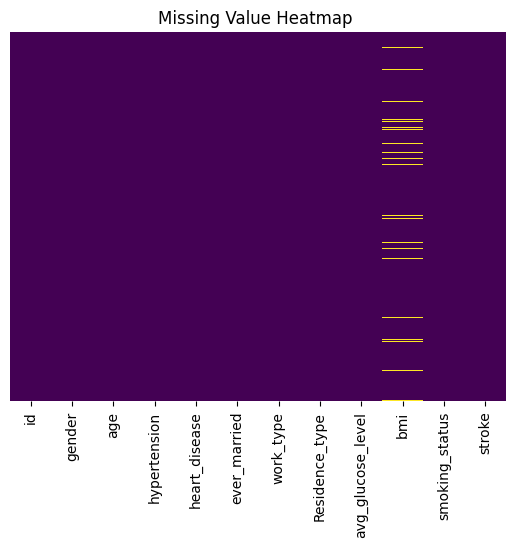

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap ')
plt.show()

In [ ]:
#check whether there are any null values or not
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
#drop the rows in which null data belongs
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

<ipython-input-7-966358883428>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


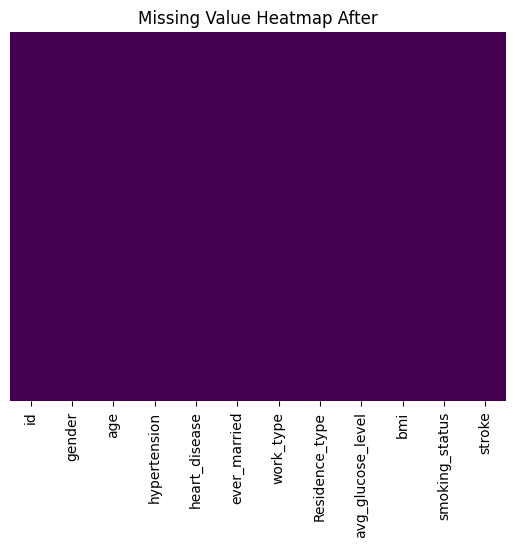

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap After')
plt.show()

In [ ]:
#checking whether the rows are dropped or not
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
#number of rows and columns after dropping
df.shape

(5110, 12)

In [ ]:
#displays the values count of gender column
df['gender'].value_counts()


,count
gender,
Female,2994
Male,2115
Other,1


<Axes: xlabel='gender'>

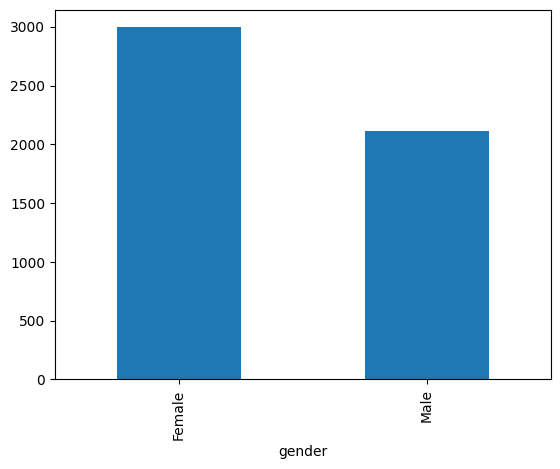

In [ ]:
#Dropping the row with gender === Other
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
#plot the value_counts of gender column after dropping
df['gender'].value_counts().plot(kind='bar')

In [ ]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df[categorical_cols].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


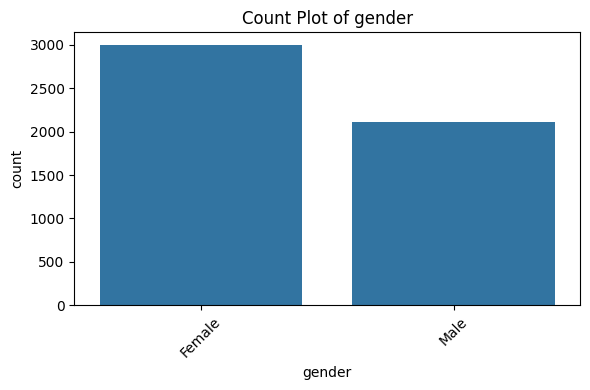

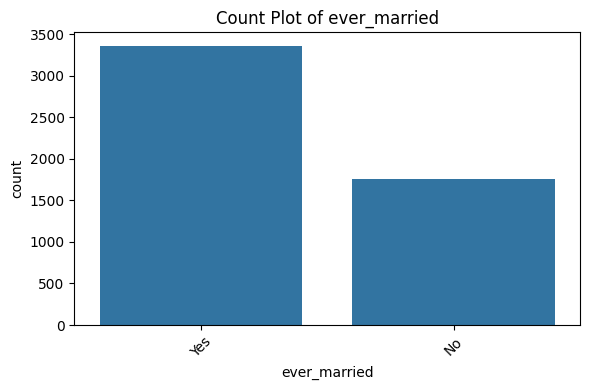

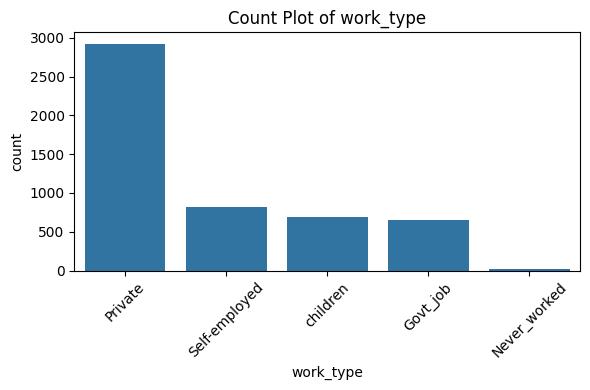

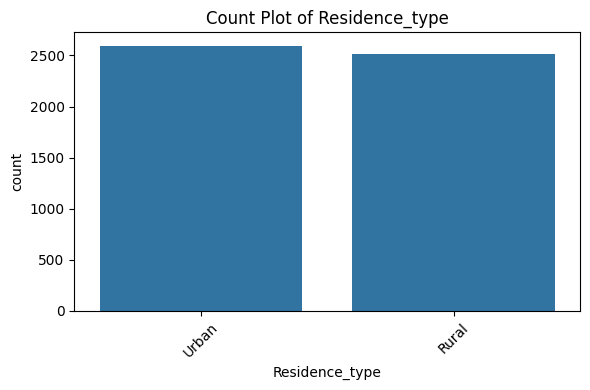

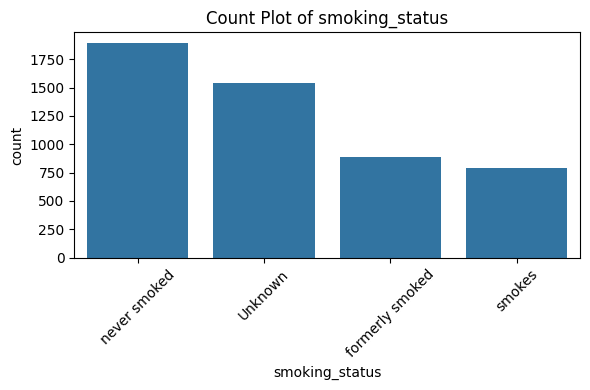

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


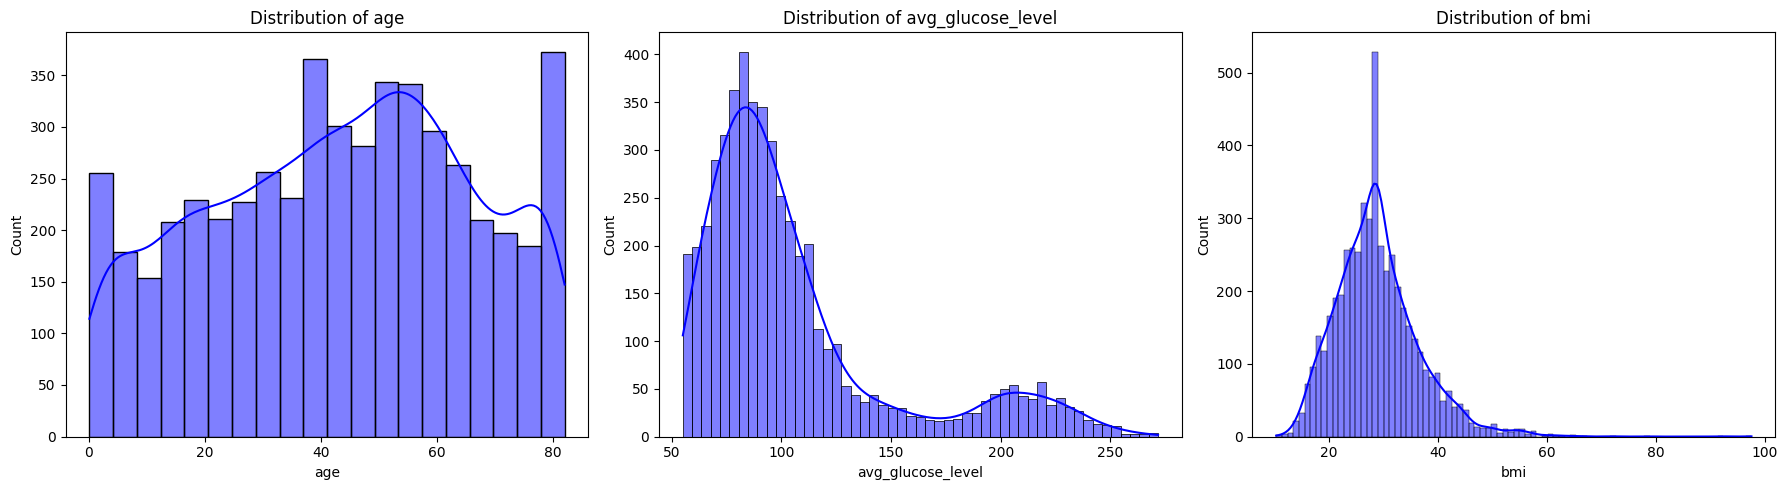

In [ ]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Create 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df[categorical_cols].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2


In [ ]:
#getting the columns information after replacing the categorical columns with number
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 518.9 KB


In [ ]:
#displaying the top 5 data after replacing
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


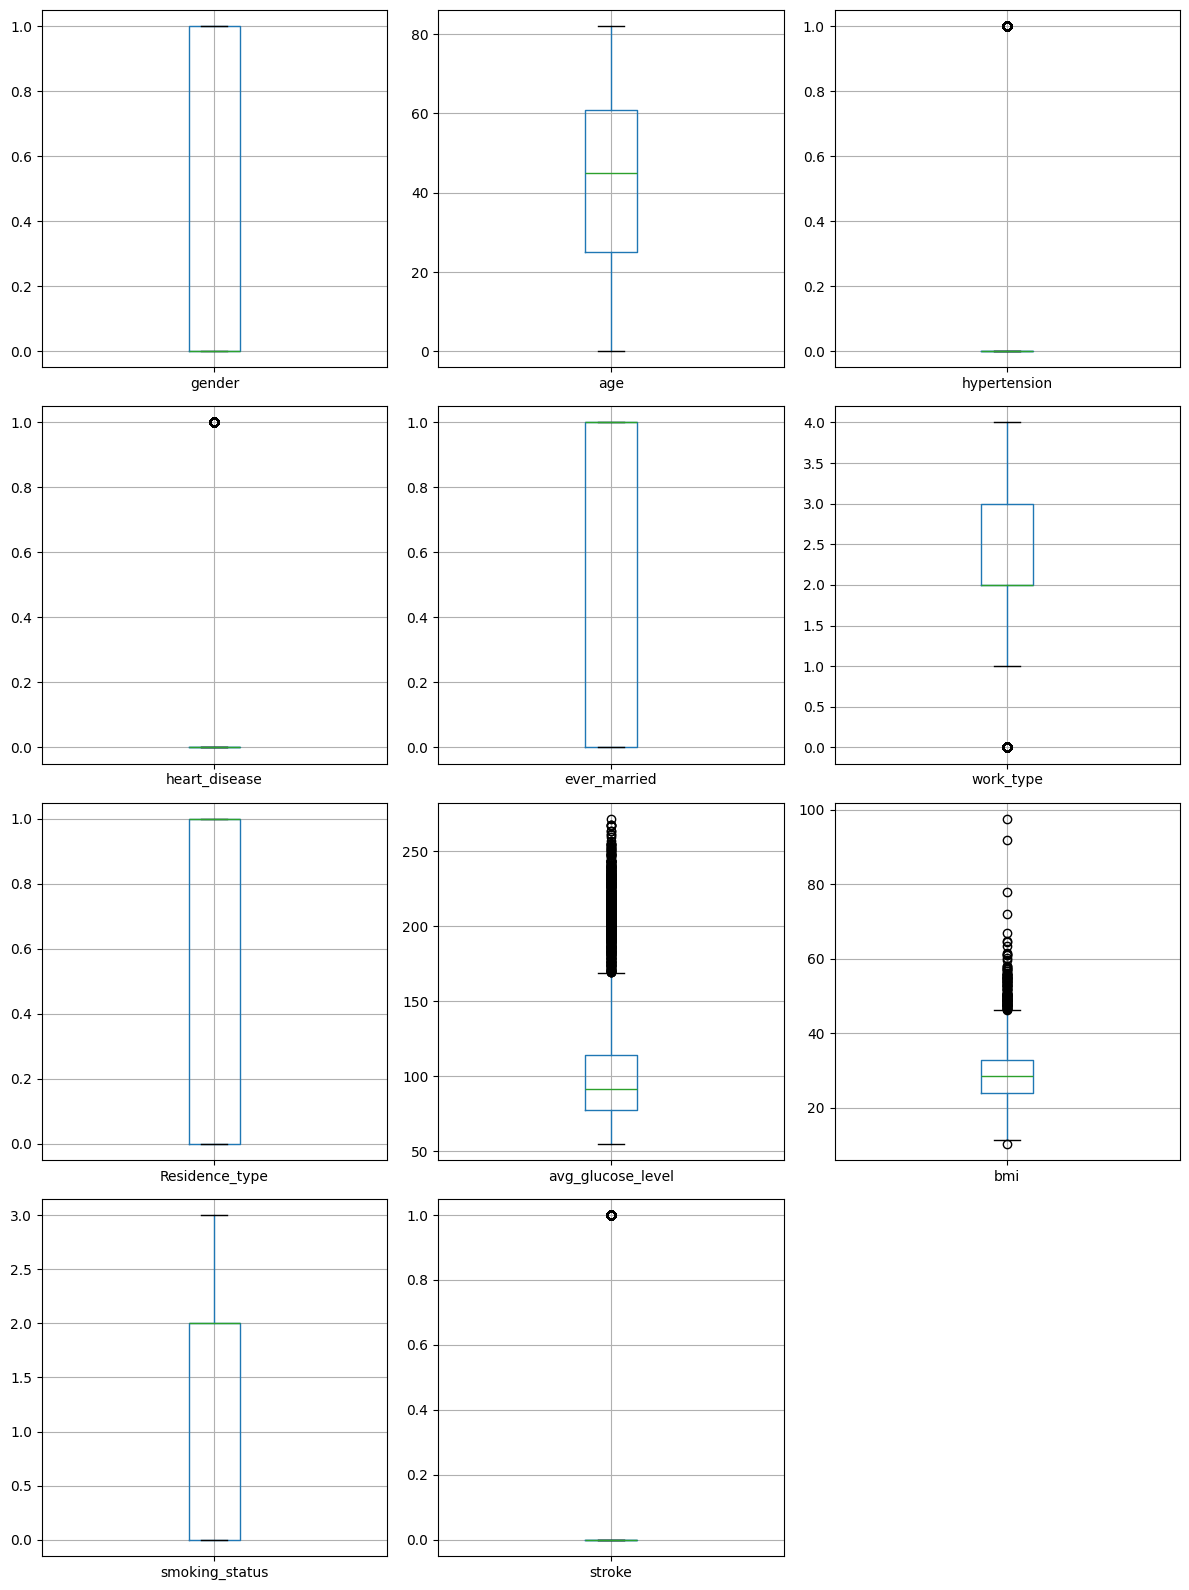

In [ ]:
plt.figure(figsize=(12, 16))
i = 1
for col in df.columns:
    if col != 'id':  # Skip the 'id' column
        plt.subplot(4, 3, i)
        df[[col]].boxplot()
        i += 1
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
#remove the outlier  of 'avg_glucose_levl' column using IQR method
data1 = ['avg_glucose_level']
for col in data1:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[col] = np.where(df[col]>upper_limit,upper_limit ,
                      np.where(df[col]<lower_limit,lower_limit, df[col]))

In [ ]:
#remove the outlier  of 'bmi' column using IQR method
data2 = ['bmi']
for col in data2:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[col] = np.where(df[col]>upper_limit,upper_limit ,
                      np.where(df[col]<lower_limit,lower_limit, df[col]))

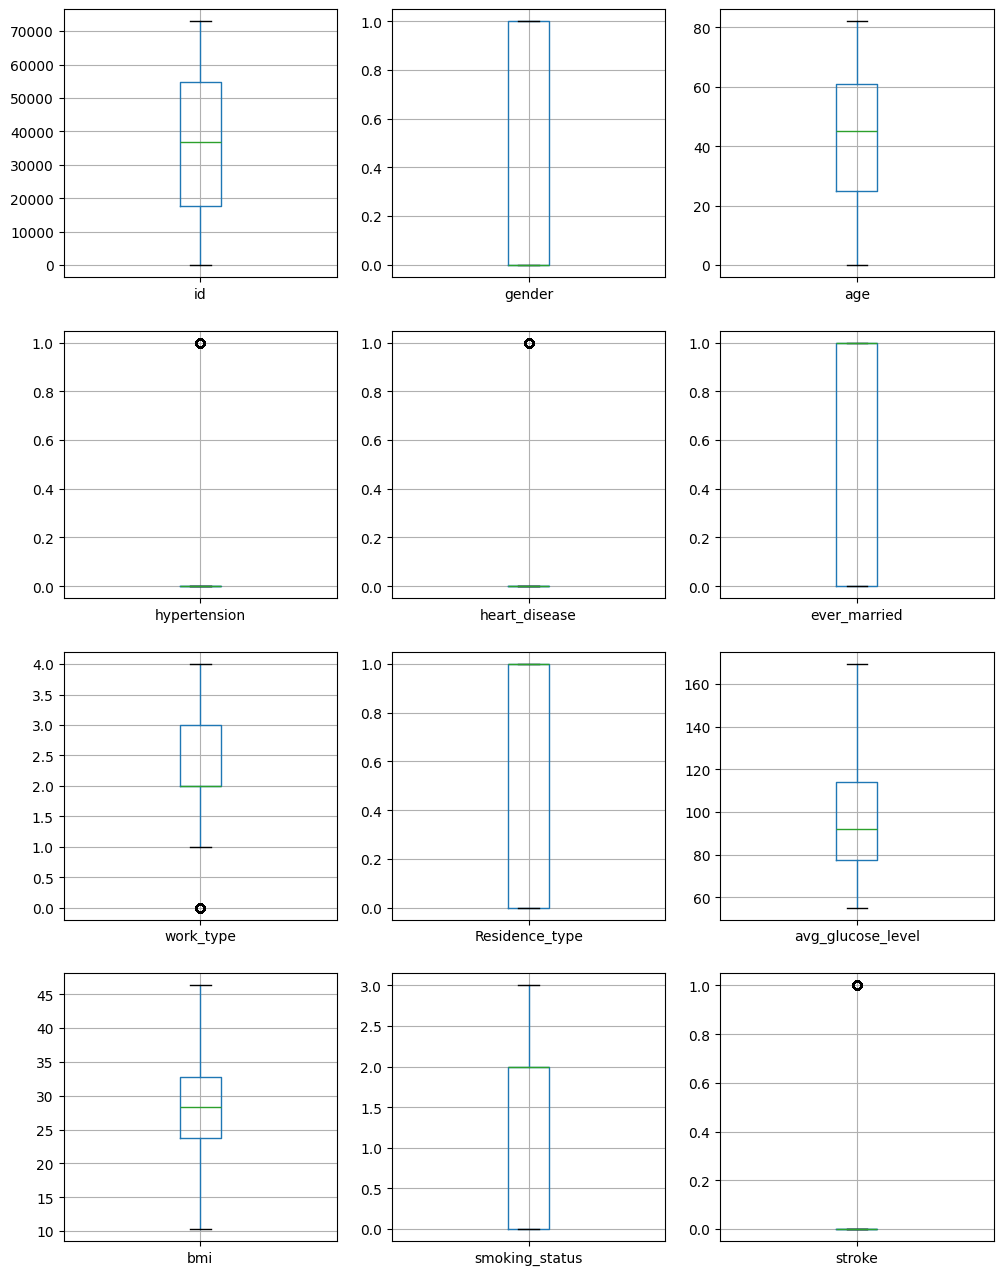

In [ ]:
## After handling outliers
# Detecting outliers
plt.figure(figsize=(12,16))
i=1
for col in df.columns:
    plt.subplot(4,3,i)
    df[[col]].boxplot()
    i+=1

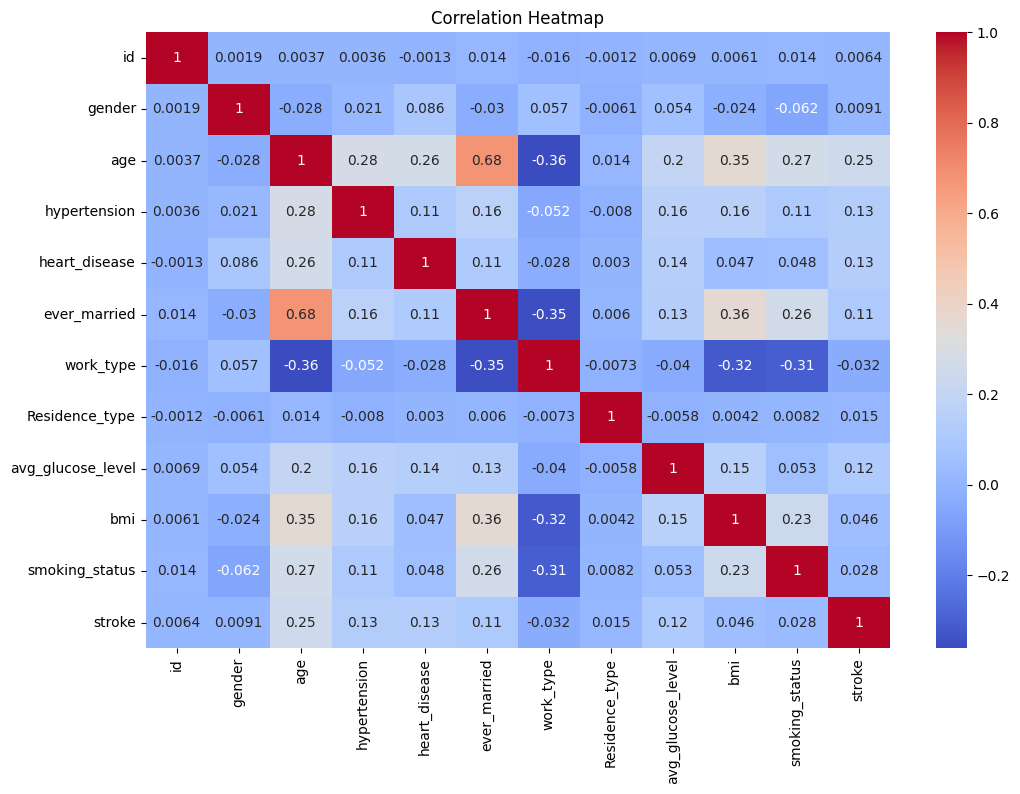

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-25-addd0a4ab5df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='viridis')


<Axes: xlabel='stroke', ylabel='count'>

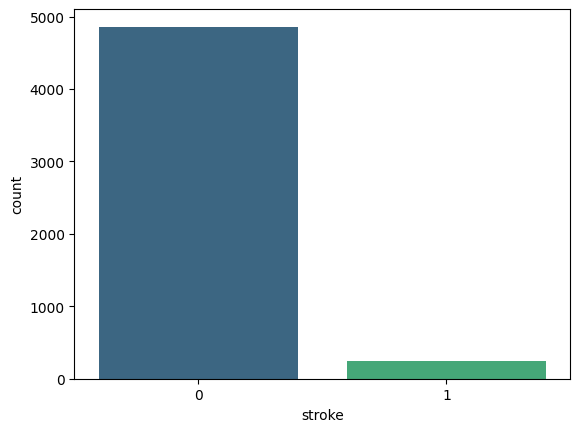

In [ ]:
df['stroke'].value_counts()

df['stroke'].value_counts() * 100 / len(df)


sns.countplot(x='stroke', data=df, palette='viridis')

In [ ]:
df[numerical_cols].describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.229986,100.988838,28.722850
std,22.613575,33.214602,7.120088
min,0.080000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,169.365000,46.300000


In [ ]:
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)




=== Baseline Model (Imbalanced Data) ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

AUC-ROC: 0.7905


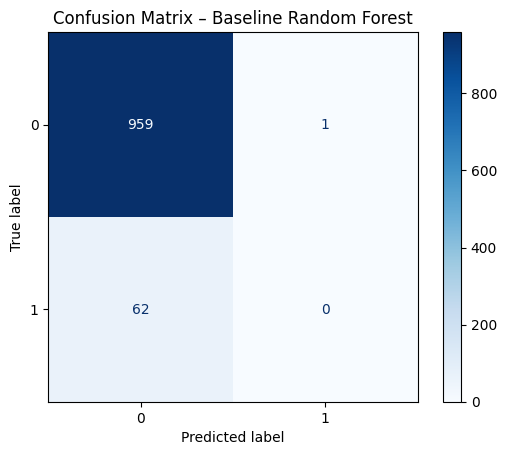

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train baseline Random Forest
rf_baseline = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_baseline.fit(X_train, y_train)

# Evaluate baseline
y_pred_base = rf_baseline.predict(X_test)
y_proba_base = rf_baseline.predict_proba(X_test)[:,1]

print("\n=== Baseline Model (Imbalanced Data) ===")
print(classification_report(y_test, y_pred_base))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_base):.4f}")



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_base)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_baseline.classes_)
disp.plot(cmap=plt.cm.Blues)

# Title and layout
plt.title("Confusion Matrix – Baseline Random Forest")
plt.grid(False)
plt.show()


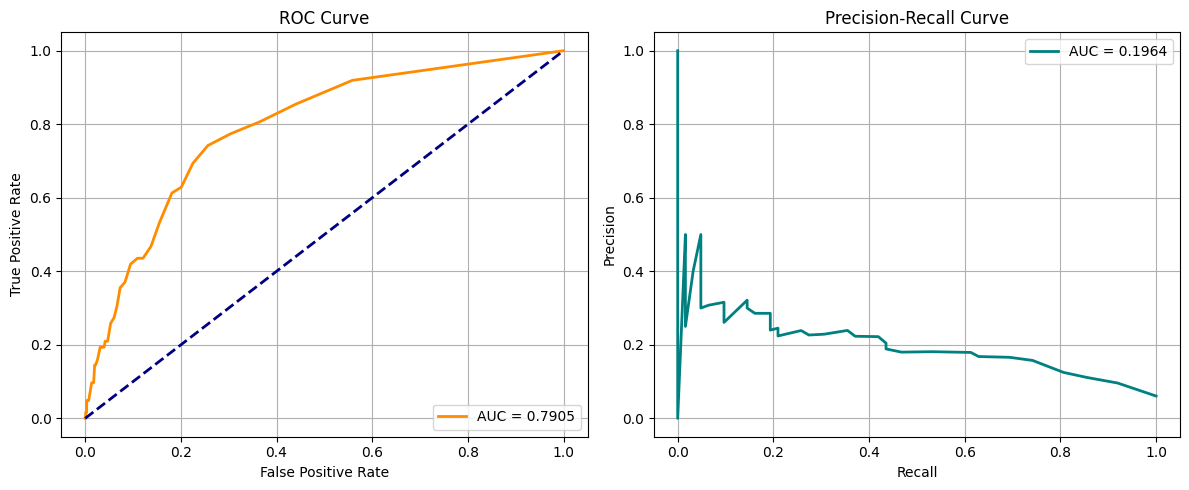

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_base)
roc_auc = auc(fpr, tpr)

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_base)
pr_auc = auc(recall, precision)

# Plotting both
plt.figure(figsize=(12, 5))

# --- ROC Curve ---
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)

# --- Precision-Recall Curve ---
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='teal', lw=2, label=f"AUC = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
X_smote, y_smote = pipeline.fit_resample(X, y)
Counter(y_smote)



Counter({0: 2490, 1: 2490})

In [ ]:
from sklearn.model_selection import train_test_split

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.15, random_state = 2)

<ipython-input-32-59d0346fd59a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df_smote, palette='viridis')


<Axes: xlabel='stroke', ylabel='count'>

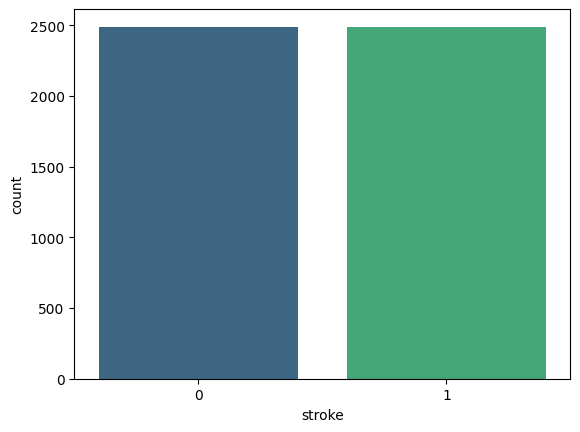

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate a DataFrame from resampled data
df_smote = pd.DataFrame(X_smote, columns=X.columns)
df_smote['stroke'] = y_smote  # Add the target column back

df_smote['stroke'].value_counts()

df_smote['stroke'].value_counts() * 100 / len(df)


sns.countplot(x='stroke', data=df_smote, palette='viridis')


In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, train_size=0.8, random_state=42)
class_count = y_test_smote.value_counts()
print(class_count)

stroke
0    501
1    495
Name: count, dtype: int64



=== SMOTE-Augmented Model ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       501
           1       0.90      0.95      0.92       495

    accuracy                           0.92       996
   macro avg       0.92      0.92      0.92       996
weighted avg       0.92      0.92      0.92       996

AUC-ROC: 0.9734


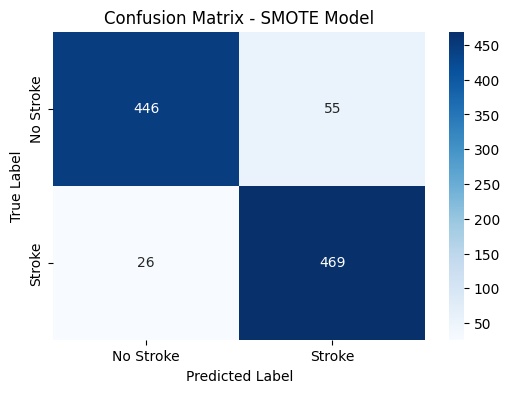

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
# Train new Random Forest on SMOTE data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Evaluate SMOTE model
y_pred_smote = rf_smote.predict(X_test_smote)
y_proba_smote = rf_smote.predict_proba(X_test_smote)[:,1]

print("\n=== SMOTE-Augmented Model ===")
print(classification_report(y_test_smote, y_pred_smote))
print(f"AUC-ROC: {roc_auc_score(y_test_smote, y_proba_smote):.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test_smote, y_pred_smote)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SMOTE Model')
plt.show()

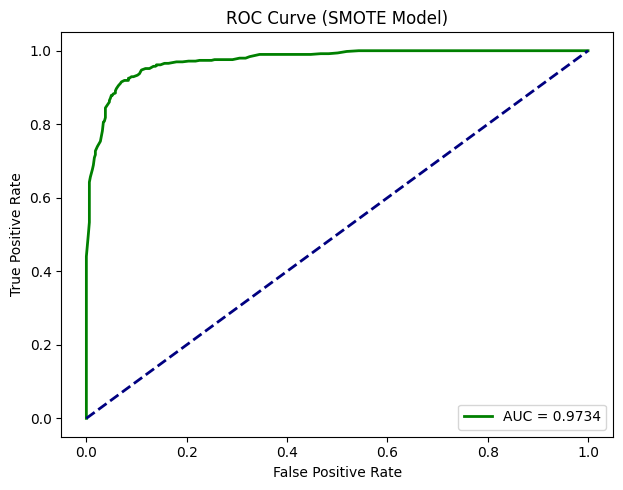

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Calculate ROC curve for SMOTE model
fpr_smote, tpr_smote, _ = roc_curve(y_test_smote, y_proba_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

# Calculate Precision-Recall curve for SMOTE model
precision_smote, recall_smote, _ = precision_recall_curve(y_test_smote, y_proba_smote)
pr_auc_smote = auc(recall_smote, precision_smote)

# Plotting
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_smote, tpr_smote, color='green', lw=2, label=f"AUC = {roc_auc_smote:.4f}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SMOTE Model)")
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


In [ ]:
import shap
import pandas as pd

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_smote.columns)
# Use TreeExplainer if you're using a tree-based model like RandomForest or XGBoost
explainer = shap.TreeExplainer(rf_smote)
# Compute SHAP values for X_test
shap_values = explainer.shap_values(X_train_smote_df)
# Step 3: Convert to NumPy array if needed
shap_values_np = np.array(shap_values)  # Shape: (n_samples, n_features, 2)

print(f"Raw SHAP values shape: {shap_values_np.shape}")


Raw SHAP values shape: (3984, 10, 2)


In [ ]:
# Step 4: Compute global mean absolute SHAP values across both classes and all samples
shap_importance_global = np.abs(shap_values_np).mean(axis=(0, 2))  # Shape: (n_features,)

# Step 5: Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_smote_df.columns,
    'SHAP_Importance': shap_importance_global
})

# Step 6: Sort and get top 5 features
top_5_features_global = feature_importance_df.sort_values('SHAP_Importance', ascending=False).head(5)

print("\nTop 5 Most Globally Important Features (Both Classes):")
print(top_5_features_global[['Feature', 'SHAP_Importance']])

# Optional: list of feature names only
top_5_feature_names = top_5_features_global['Feature'].tolist()
print("\nTop 5 Feature Names:", top_5_feature_names)


Top 5 Most Globally Important Features (Both Classes):
             Feature  SHAP_Importance
1                age         0.225473
7  avg_glucose_level         0.059463
8                bmi         0.058857
5          work_type         0.057202
9     smoking_status         0.042592

Top 5 Feature Names: ['age', 'avg_glucose_level', 'bmi', 'work_type', 'smoking_status']


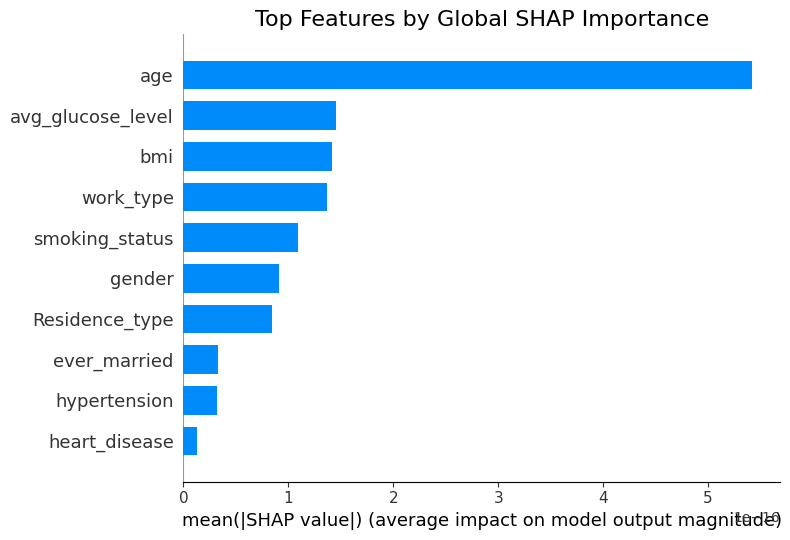

In [ ]:
import shap
import matplotlib.pyplot as plt

# Start a new figure
plt.figure(figsize=(10, 6))

# SHAP bar plot
shap.summary_plot(
    shap_values=shap_values_np.mean(axis=2),
    features=X_train_smote_df,
    feature_names=X_train_smote_df.columns,
    plot_type="bar",
    show=False
)

# Add custom title and show
plt.title("Top Features by Global SHAP Importance", fontsize=16)
plt.tight_layout()
plt.show()


=== Evaluation on Test Set (Top SHAP Features) ===
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       501
           1       0.90      0.93      0.91       495

    accuracy                           0.91       996
   macro avg       0.91      0.91      0.91       996
weighted avg       0.91      0.91      0.91       996

AUC-ROC: 0.9709


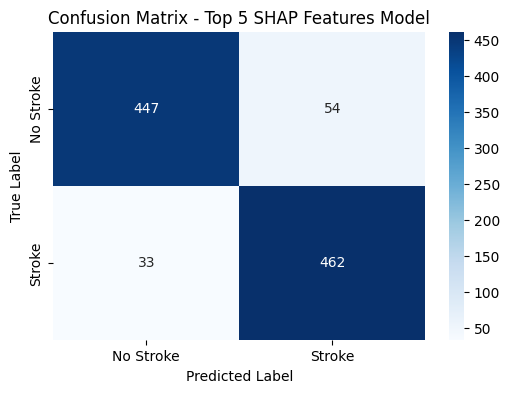

In [ ]:
# Select top features from training data
X_train_top = X_train_smote_df[top_5_feature_names]
X_test_top = pd.DataFrame(X_test_smote, columns=X_smote.columns)[top_5_feature_names]

# Train model
rf_smote_top = RandomForestClassifier(random_state=42)
rf_smote_top.fit(X_train_top, y_train_smote)

# Evaluate
y_pred_top = rf_smote_top.predict(X_test_top)
y_proba_top = rf_smote_top.predict_proba(X_test_top)[:,1]

print("=== Evaluation on Test Set (Top SHAP Features) ===")
print(classification_report(y_test_smote, y_pred_top))
print(f"AUC-ROC: {roc_auc_score(y_test_smote, y_proba_top):.4f}")

# Compute confusion matrix
cm_top = confusion_matrix(y_test_smote, y_pred_top)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_top, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Top 5 SHAP Features Model')
plt.show()


Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced'}
=== Tuned Model Evaluation ===
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       501
           1       0.89      0.94      0.91       495

    accuracy                           0.91       996
   macro avg       0.91      0.91      0.91       996
weighted avg       0.91      0.91      0.91       996

AUC-ROC: 0.9727292888969536


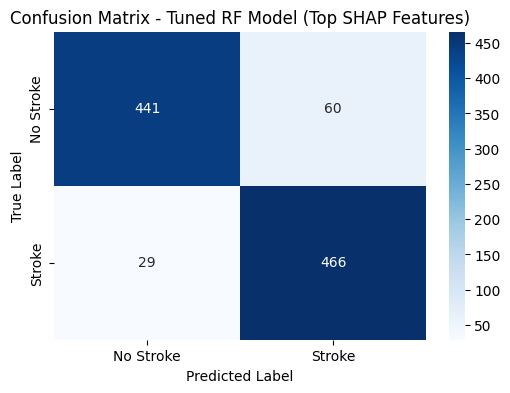

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# 1. Data
X_train_top = X_train_smote[top_5_feature_names]
X_test_top = X_test_smote[top_5_feature_names]  # Or: X_test[top_5_feature_names]
y_test_eval = y_test_smote  # Or: y_test

# 2. Hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# 3. CV + model
rf = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=35,
    cv=skf,
    scoring='precision',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 5. Fit
random_search.fit(X_train_top, y_train_smote)

# 6. Best model
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# 7. Evaluation
y_pred_tuned = best_model.predict(X_test_top)
y_proba_tuned = best_model.predict_proba(X_test_top)[:, 1]

print("=== Tuned Model Evaluation ===")
print(classification_report(y_test_eval, y_pred_tuned))
print("AUC-ROC:", roc_auc_score(y_test_eval, y_proba_tuned))

# Compute confusion matrix
cm_tuned = confusion_matrix(y_test_eval, y_pred_tuned)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Tuned RF Model (Top SHAP Features)')
plt.show()

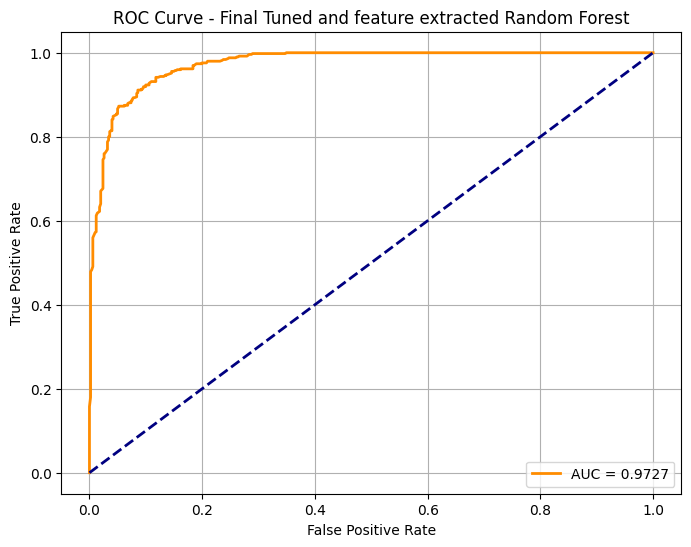

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC curve data
fpr, tpr, _ = roc_curve(y_test_smote, y_proba_tuned)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Tuned and feature extracted Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best Parameters for Baseline Model: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced'}

=== Tuned Baseline Model Evaluation (All Features) ===
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       501
           1       0.89      0.95      0.92       495

    accuracy                           0.92       996
   macro avg       0.92      0.92      0.92       996
weighted avg       0.92      0.92      0.92       996

AUC-ROC: 0.9739


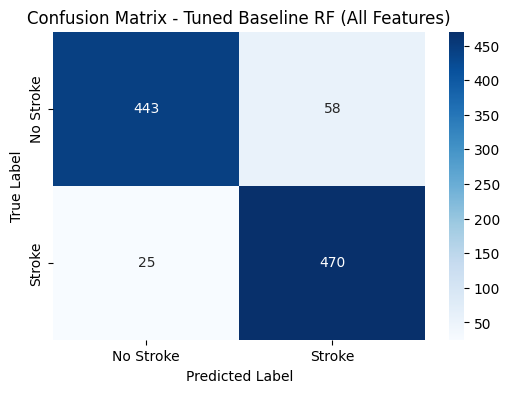

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# 1. Prepare your training data (all features)
X_train_all = X_train_smote  # all features from SMOTE data
y_train_all = y_train_smote

# 2. Define hyperparameter search space (same as SHAP-selected tuning)
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

# 3. Initialize model and cross-validator
rf = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=35,
    cv=skf,
    scoring='precision',  # AUC-ROC is good for imbalance problems
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 5. Fit to the training data (all features)
random_search.fit(X_train_all, y_train_all)

# 6. Best estimator and parameters
best_model_all = random_search.best_estimator_
print("Best Parameters for Baseline Model:", random_search.best_params_)

# 7. Evaluate on test data
y_pred_all = best_model_all.predict(X_test_smote)
y_proba_all = best_model_all.predict_proba(X_test_smote)[:, 1]

print("\n=== Tuned Baseline Model Evaluation (All Features) ===")
print(classification_report(y_test_smote, y_pred_all))
print(f"AUC-ROC: {roc_auc_score(y_test_smote, y_proba_all):.4f}")


# Compute confusion matrix
cm_all = confusion_matrix(y_test_smote, y_pred_all)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Tuned Baseline RF (All Features)')
plt.show()


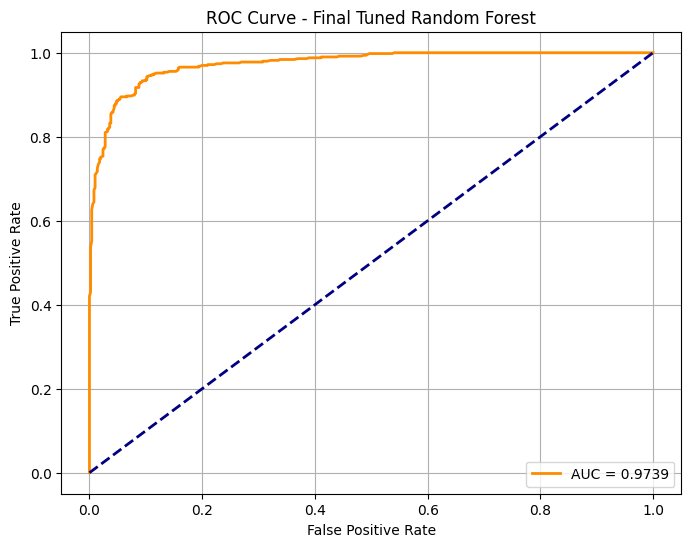

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC curve data
fpr, tpr, _ = roc_curve(y_test_smote, y_proba_all)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Tuned Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
